In [45]:
# Mubeen Quadrt
# ECGR 4105
# Student ID: 801064313
# Reference: SVR Pdf, Housing data

In [46]:
#1. Plot your regression model for SVR similar to the sample code provided on Canvas.
#2. Compare your results against linear regression with regularization loss that you already did in homework1. 
#3. Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest regression accuracy. 
#4. Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.

In [47]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [48]:
from sklearn.svm import SVR
housing = pd.read_csv("https://raw.githubusercontent.com/MubeenQ/IntroToML/main/Housing.csv")
varList=['area','bedrooms','bathrooms', 'stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea', 'price']
def binary_map(x):
    return x.replace({'yes':1,'no':0})

In [49]:
housing[varList] = housing[varList].apply(binary_map)
housing = housing[varList] 
housing.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
0,7420,4,2,3,1,0,0,0,1,2,1,13300000
1,8960,4,4,4,1,0,0,0,1,3,0,12250000
2,9960,3,2,2,1,0,1,0,0,2,1,12250000
3,7500,4,2,2,1,0,1,0,1,3,1,12215000
4,7420,4,1,2,1,1,1,0,1,2,0,11410000


In [50]:
PCA_dataset2 = housing
from sklearn.preprocessing import StandardScaler
x = PCA_dataset2.loc[:, varList].values 
y = PCA_dataset2.loc[:,['price']].values 
x = StandardScaler().fit_transform(x)

In [51]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=1) 
principalComponents = pca.fit_transform(x) 
principalDf = pd.DataFrame(data = principalComponents 
             , columns = ['principal component 1']) 

In [52]:
finalDf = pd.concat([principalDf, PCA_dataset2[['price']]], axis = 1) 
finalDf

,principal component 1,price
0,5.158081,13300000
1,6.587988,12250000
2,4.183590,12250000
3,5.152171,12215000
4,3.912156,11410000
...,...,...
540,-1.743058,1820000
541,-3.008884,1767150
542,-2.589849,1750000
543,-2.931391,1750000


In [53]:
from sklearn.preprocessing import MinMaxScaler

x = finalDf.iloc[:, [0]]
y = finalDf.iloc[:, 1]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler
X_test.shape
x.shape

(545, 1)

In [54]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_lin = SVR(kernel='linear', C=1e3) 
svr_poly = SVR(kernel='poly', C=1e3, degree=2) 
y_rbf = svr_rbf.fit(x, y).predict(x) 
y_lin = svr_lin.fit(x, y).predict(x) 
y_poly = svr_poly.fit(x, y).predict(x) 

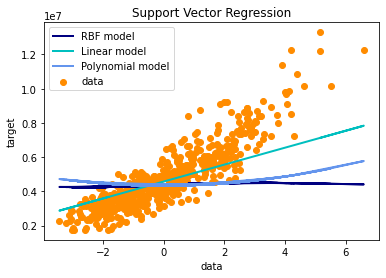

In [55]:
lw = 2 
plt.scatter(x, y, color='darkorange', label='data') 
plt.plot(x, y_rbf, color='navy', lw=lw, label='RBF model') 
plt.plot(x, y_lin, color='c', lw=lw, label='Linear model') 
plt.plot(x, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model') 
plt.xlabel('data') 
plt.ylabel('target') 
plt.title('Support Vector Regression') 
plt.legend() 
plt.show() 

In [44]:
#theta, cost = linear_regression(X_t, Y_t, 0.01, 545)
#cost = list(cost)

#theta2, cost2 = linear_regression(X_v, Y_v, 0.01, 545)
#cost2 = list(cost2)
#iteration = [x for x in range(1,546)]
#iteration2 = [x for x in range(1,546)]
#plt.plot(iteration, cost)
#plt.plot(iteration2, cost2)
#plt.legend()
#plt.grid()
#plt.xlabel('Iterations')
#plt.ylabel('Cost')
#plt.title('Convergence')